Привет!
- Прочитайте данные из файла.
- Определите оптимальное количество кластеров для прочитанных данных.
- Постройте оптимальное разбиение на кластеры.
- Спрогнозируйте классы для векторов (ниже).
- Постройте график метрики "силуэт" в зависимости от количества кластеров.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.misc import derivative

In [2]:
vect_1 = np.array([-0.1805, -0.0659, -0.465199, 0.187700, -0.21910998])
vect_2 = np.array([0.2226875, -0.133287, 2.8845, 3.2772081, 2.93884])

Прочитаем данные.

In [3]:
df = pd.read_csv("X.csv", sep=" ", header=None)

Ничего интересного.. Числа да и только.

In [4]:
df.head()

,0,1,2,3,4
0,0.149014,0.097225,-0.424611,0.075148,0.107336
1,-0.041479,-0.115525,-0.126194,0.103934,0.168235
2,0.194307,-0.203077,-0.102814,-0.204007,0.324915
3,0.456909,0.183503,-0.240683,0.069676,0.316141
4,-0.070246,0.309300,-0.048386,0.087922,-0.413301


Входной вектор пятимерный, это значит, что "посмотреть" на него мы не сможем. Можем только попробовать построить pairplot.

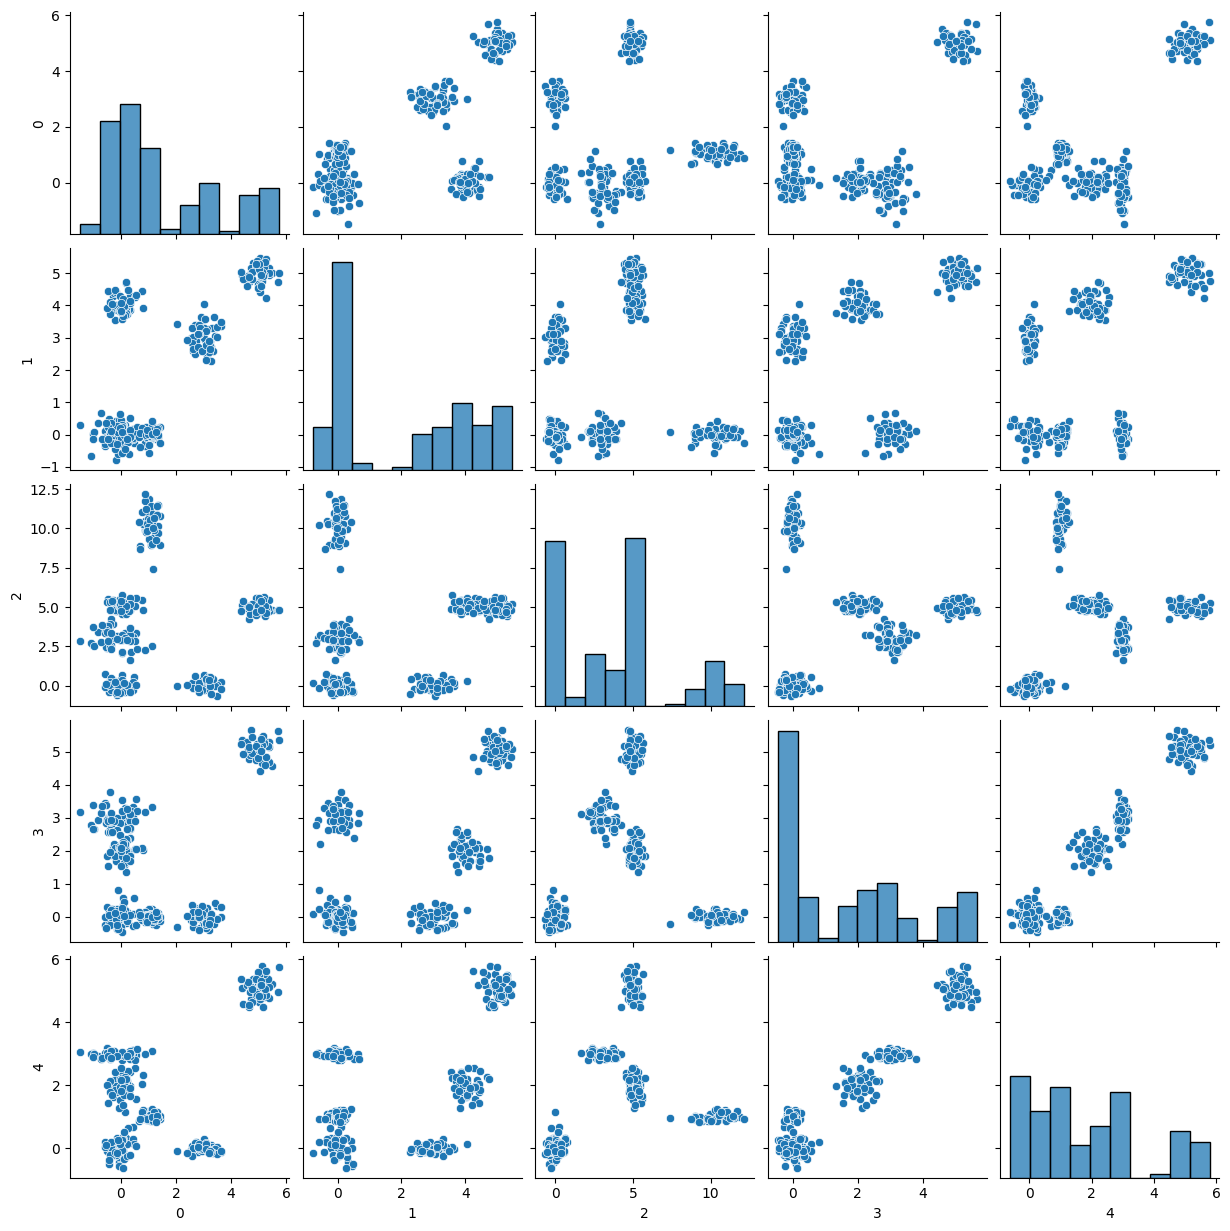

In [5]:
sns.pairplot(df);

Что-то сказать трудно. Результат на картинке не является проекциями нашего многомерного "облака", а только визуализация корреляции между собой двух фич из пяти без учёта трех оставшихся. Но по прикадкам возможно итоговой кластеризацией будет кластеризация по 4-6 группам.

И да, величины не очень большие, поэтому сколлирование применять не станем.

In [6]:
inertia_scores= []
silhouette_scores = []

for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(df)
    preds = km.predict(df)
        
    inertia_scores.append(np.sqrt(km.inertia_))
    silhouette_scores.append(silhouette_score(df, preds))

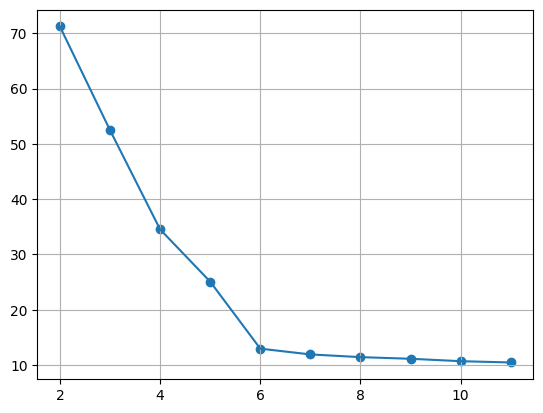

In [7]:
plt.scatter(x=[i for i in range(2,12)],y=inertia_scores)
plt.plot([i for i in range(2,12)],inertia_scores)
plt.grid(True)
plt.show()

Чисто визуально наиболее острый угол наблюдается при разбиении на 6 кластеров.

Построим график второй производной чисто для посмотреть...

In [8]:
def f(x):
    return np.interp(x, [i for i in range(2,12)], inertia_scores)

In [9]:
f_2 = []

for i in range(2,12):
    f_2.append(derivative(f, i, n=2))

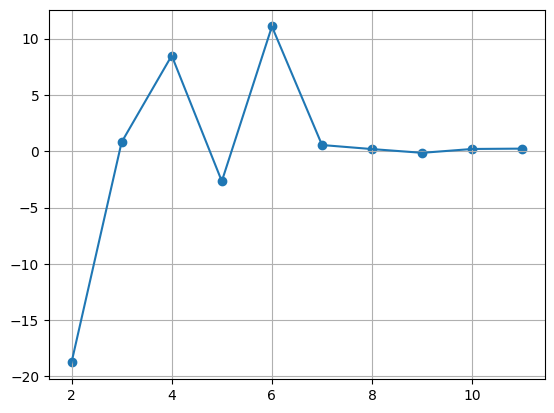

In [10]:
plt.scatter(x=[i for i in range(2,12)],y=f_2)
plt.plot([i for i in range(2,12)],f_2)
plt.grid(True)
plt.show()

Смущает вот это отрицаетльное значени в точке 2...

В точках 4 и 6 наблюдаются локальные максимумы. Это свидельствует о наличии хороших локтей. 

Оставим прежнее решение без изменения. Возможно, такое разбиение будет иметь смысл.

Обучим модель заново с числом кластеров 6 и добавим в итоговый датафрейм предикт.

In [11]:
km = KMeans(n_clusters=6, random_state=0).fit(df)
df["pred"] = km.predict(df)

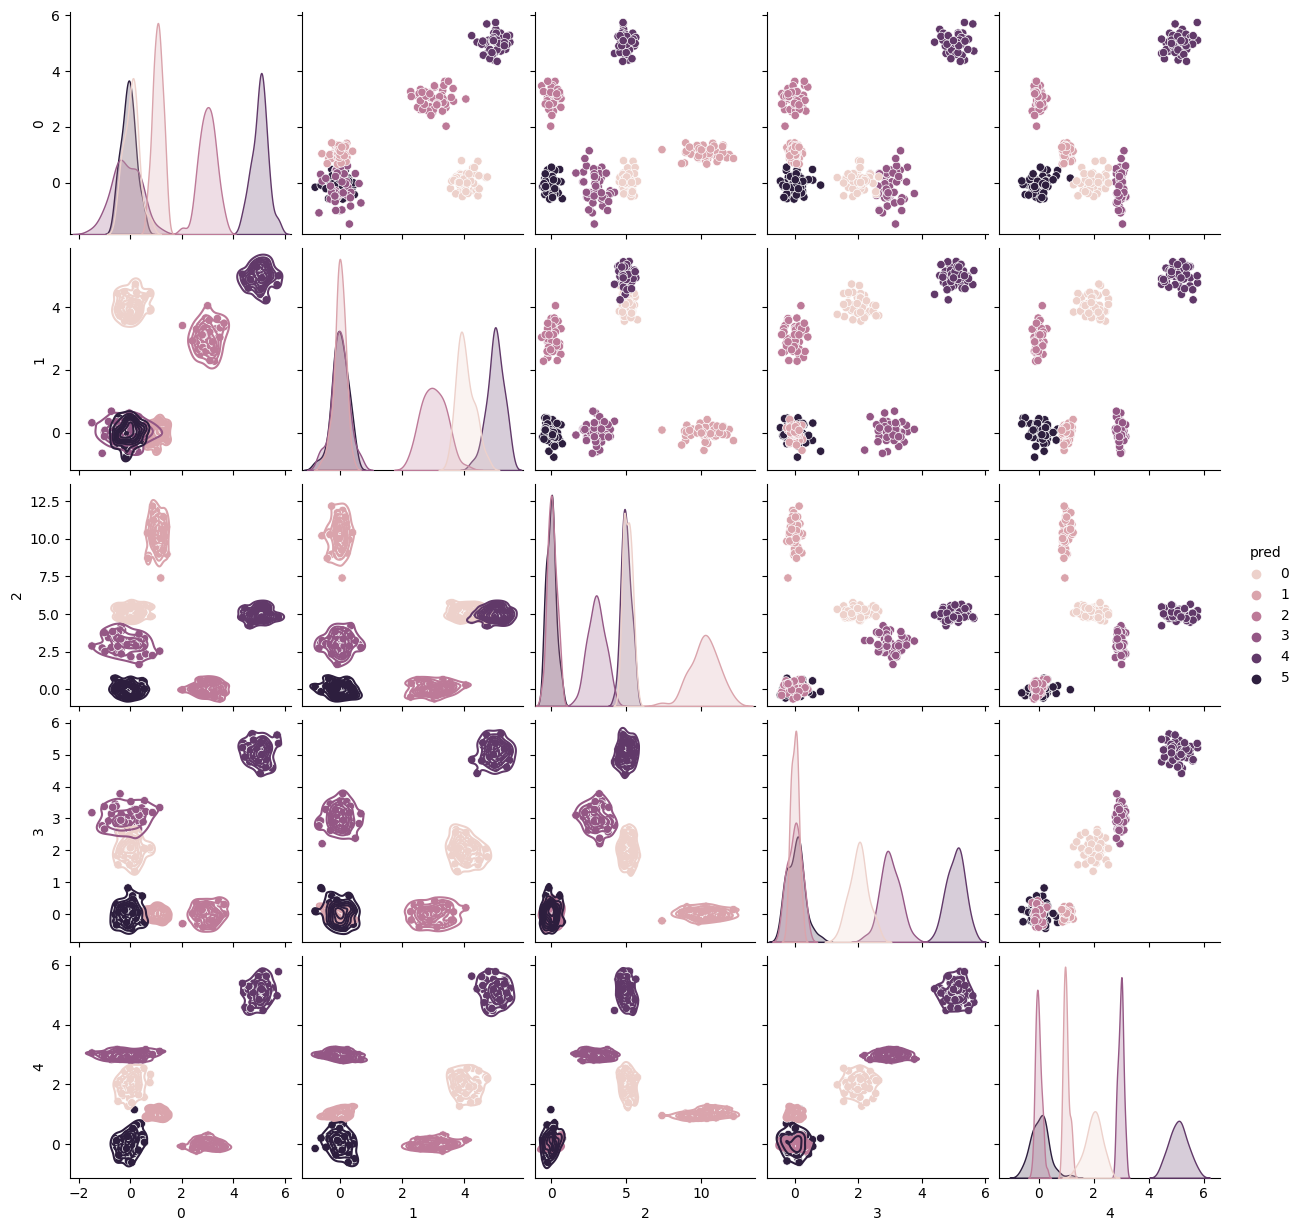

In [12]:
g = sns.pairplot(data = df, hue="pred")
g.map_lower(sns.kdeplot);

Сделаем предикт для векторов:

In [13]:
f"Вектор 1 принадлежит условной группе № {km.predict(vect_1.reshape(1, -1))[0]} при разбиении на [0:{km.n_clusters - 1}] кластеров"

'Вектор 1 принадлежит условной группе № 5 при разбиении на [0:5] кластеров'

In [14]:
f"Вектор 2 принадлежит условной группе № {km.predict(vect_2.reshape(1, -1))[0]} при разбиении на [0:{km.n_clusters - 1}] кластеров"

'Вектор 2 принадлежит условной группе № 3 при разбиении на [0:5] кластеров'

Построим график "силуэт".

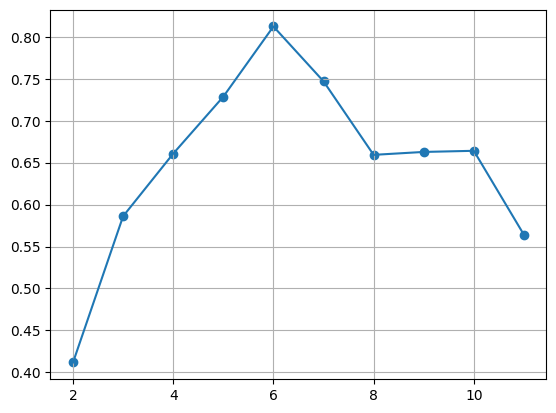

In [15]:
plt.scatter(x=[i for i in range(2,12)],y=silhouette_scores)
plt.plot([i for i in range(2,12)],silhouette_scores)
plt.grid(True)
plt.show();

Гипотеза подтвердилась. Наибольшее значение коэффициента наблюдается при разбиении на 6 групп